# Purpose
The idea of this notebook is to create a generator matrix Q with complex eigenvalues. 

In [2]:
import numpy as np
import scipy
from time import sleep
import matplotlib.pyplot as plt
from sympy import *
from scipy import * 
from sympy.solvers.solveset import linsolve
from IPython.display import clear_output
from IPython.display import display
init_printing(use_unicode=True,use_latex=True)


In [3]:
from scipy.linalg import expm

In [4]:
# Start setting up environment variables
y = symbols('y')
mat_size = 4
num_coefficients = mat_size**2
ass = symbols('a0:%d'%num_coefficients)
lambdas = (0.25,0.5,0.75,1)

# System of Linear Equations Method(not finished)

In [54]:
#M = Matrix([[ass[0], ass[1], ass[2],ass[3]], [ass[4], ass[5],ass[6], ass[7]], [ass[8],ass[0]]]) 
m = []
for k in range(mat_size):
    i = k*mat_size
    m.append(ass[i:i+mat_size])
M = Matrix(m)
print(M)
MATSIZE = M.rank() 
lamda = symbols('lamda') 

#det = M.det()
poly = M.charpoly(lamda) # Get the characteristic polynomial print(poly)
poly

Matrix([[a0, a1, a2, a3], [a4, a5, a6, a7], [a8, a9, a10, a11], [a12, a13, a14, a15]])


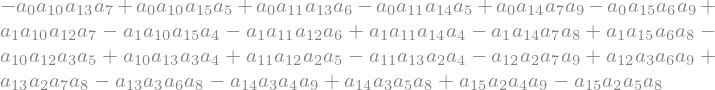

In [56]:
# Set the values
poly_0 = poly.subs({lamda: 0.25})
poly_1 = poly.subs({lamda: 0.50})
poly_2 = poly.subs({lamda: 0.70})
poly_3 = poly.subs({lamda: 1})

#display(poly_0)
display(poly.coeffs()[4])

In [45]:
# Another way 
l = []
for k in range(mat_size):
    l.append([lambdas[k]**v for v in range(mat_size,0,-1)])
L = Matrix(l)
print(L)

Matrix([[0.00390625000000000, 0.0156250000000000, 0.0625000000000000, 0.250000000000000], [0.0625000000000000, 0.125000000000000, 0.250000000000000, 0.500000000000000], [0.316406250000000, 0.421875000000000, 0.562500000000000, 0.750000000000000], [1, 1, 1, 1]])


In [60]:
L = np.matrix(L, dtype='float')
invL = np.linalg.inv(L)
coeff_5_vec = np.ones((4,1))
print(coeff_5_vec)
print(invL)
print('Solution')
print(invL@coeff_5_vec)

[[1.]
 [1.]
 [1.]
 [1.]]
[[ -42.66666667   64.          -42.66666667   10.66666667]
 [  96.         -128.           74.66666667  -16.        ]
 [ -69.33333333   76.          -37.33333333    7.33333333]
 [  16.          -12.            5.33333333   -1.        ]]
Solution
[[-10.66666667]
 [ 26.66666667]
 [-23.33333333]
 [  8.33333333]]


# Random Guesses
Here we are working with just stating of with a Q value matrix that is generated at random. Where all of its values add up to 0 and there are non-netgative on the off diagonals. You have to show one of the only 

In [14]:
# At random 
while True:
    clear_output(wait=True)
    rand_mat = np.random.chisquare(1,size=(5,5))
    #rand_mat = np.random.uniform(0,3,size=(5,5))
    for i in range(5):
        rand_mat[i,i] = -1*(np.sum(rand_mat[i,:]) - rand_mat[i,i])
    print("Sum across Columns:\n",np.sum(rand_mat,axis=1))
    print("\nResultant Matrix")
    print(rand_mat)
    print("Its Eigenvalues:")
    print(["{:.2f}".format(val) for val in np.linalg.eigvals(rand_mat)])
    sleep(1)

Sum across Columns:
 [ 3.60822483e-16  5.55111512e-17 -1.94289029e-16 -8.88178420e-16
  0.00000000e+00]

Resultant Matrix
[[ -1.23124148   0.54233221   0.44882581   0.04961404   0.19046942]
 [  0.25874944  -1.02862696   0.18321866   0.09400304   0.49265581]
 [  0.07245385   1.29559196  -3.16971393   1.72250457   0.07916355]
 [  0.50891163   4.27312687   3.10839799  -9.60712377   1.71668727]
 [  0.20937886   0.65672273   0.72885202   9.01224326 -10.60719686]]
Its Eigenvalues:
['-14.09', '-7.30', '0.00', '-1.51', '-2.74']


KeyboardInterrupt: 

## Only for birth and death
The cell below is for only birth and death processes but after some tests it does not show any complex eigenvalues

In [15]:
#Same but only for Birth and Death
while True:
    clear_output(wait=True)
    rand_mat = np.zeros((mat_size,mat_size))
    arr_rate = np.random.uniform(0,100) * np.ones((mat_size-1))
    serv_rate = np.random.uniform(0,100) * np.ones((mat_size-1))

    print(arr_rate)
    print(np.diag(arr_rate,1))
    rand_mat += np.diag(arr_rate,1) 
    rand_mat += np.diag(serv_rate,-1) 
    print(rand_mat)
    for i in range(mat_size):
        rand_mat[i,i] = -1*(np.sum(rand_mat[i,:]) - rand_mat[i,i])
    print(np.sum(rand_mat,axis=1))
    print(rand_mat)
    print("Eigenvalues for this matrix:", [ "{:.2f}".format(val) for val in np.linalg.eigvals(rand_mat)])
    sleep(1)

[63.68020405 63.68020405 63.68020405]
[[ 0.         63.68020405  0.          0.        ]
 [ 0.          0.         63.68020405  0.        ]
 [ 0.          0.          0.         63.68020405]
 [ 0.          0.          0.          0.        ]]
[[ 0.         63.68020405  0.          0.        ]
 [77.77075229  0.         63.68020405  0.        ]
 [ 0.         77.77075229  0.         63.68020405]
 [ 0.          0.         77.77075229  0.        ]]
[0. 0. 0. 0.]
[[ -63.68020405   63.68020405    0.            0.        ]
 [  77.77075229 -141.45095634   63.68020405    0.        ]
 [   0.           77.77075229 -141.45095634   63.68020405]
 [   0.            0.           77.77075229  -77.77075229]]
Eigenvalues for this matrix: ['-240.97', '-141.45', '0.00', '-41.93']


KeyboardInterrupt: 

L1 norm of Q Matrix:  11.521678799658362
Sanity check sum  [1. 1. 1. 1. 1.]
Eigenvals of P  ['1.00+0.00j', '0.03+0.01j', '0.03-0.01j', '0.00+0.00j', '0.01+0.00j']


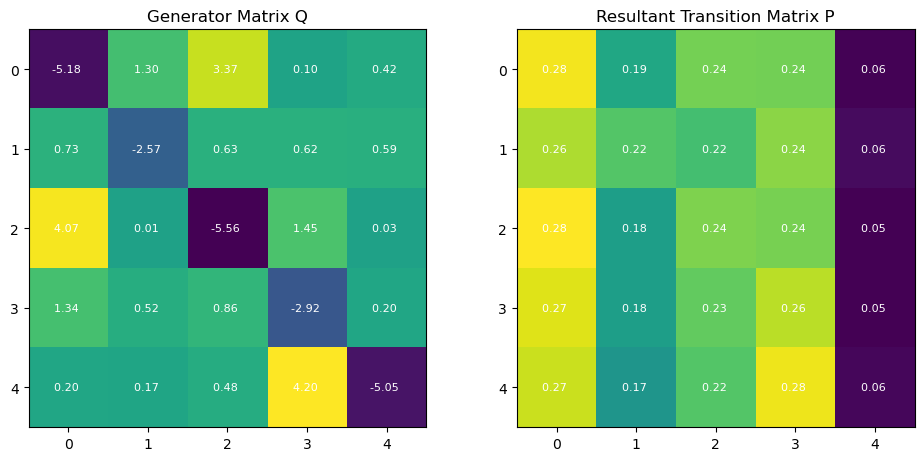

In [13]:
# Pretty Print it 
fig, axs = plt.subplots(1,2)
font_size = 8
fig.tight_layout()
fig.set_size_inches(10,10)
Q = rand_mat
#Q = np.load('complex_generator.npy')

P = scipy.linalg.expm(Q)
print("L1 norm of Q Matrix: ",np.linalg.norm(Q,ord=1) )
print("Sanity check sum ",np.sum(P,axis=1))
print("Eigenvals of P ", ["{:.2f}".format(val) for val in np.linalg.eigvals(P)])


axs[0].imshow(Q)
axs[0].set_title('Generator Matrix Q')
axs[1].imshow(P)
axs[1].set_title('Resultant Transition Matrix P')
for i in range(Q.shape[0]):
    for j in range(Q.shape[1]):
        axs[0].text(j,i,"%2.2f " % Q[i,j],ha="center",va="center",color="w",fontsize=font_size)
        axs[1].text(j,i,"%2.2f " % P[i,j],ha="center",va="center",color="w",fontsize=font_size)
        



In [77]:
# Then get the Transition probability matrix


array([1., 1., 1., 1., 1.])

# Save the Matrices 

In [2]:
from numpy import asarray
from numpy import save

In [27]:
np.save('complex_generator.npy',Q)